In [1]:
from CLOPE import CLOPE
import pandas as pd
import numpy as np

In [20]:
import pandas as pd

# Загрузка данных из CSV файлов с указанием кодировки и типов данных
data0 = pd.read_csv('/home/tofan/Документы/GitHub/Tennis/tennis_MatchChartingProject/charting-m-points-to-2009.csv', encoding='ISO-8859-1', low_memory=False, dtype=str)
data1 = pd.read_csv('/home/tofan/Документы/GitHub/Tennis/tennis_MatchChartingProject/charting-m-points-2010s.csv', encoding='ISO-8859-1', low_memory=False, dtype=str)
data2 = pd.read_csv('/home/tofan/Документы/GitHub/Tennis/tennis_MatchChartingProject/charting-m-points-2020s.csv', encoding='ISO-8859-1', low_memory=False, dtype=str)

# Объединение данных
data = pd.concat([data0, data1, data2], ignore_index=True)

# Замена NaN на пустую строку в столбцах '1st' и '2nd'
data['1st'].fillna('', inplace=True)
data['2nd'].fillna('', inplace=True)
data['Serving'].fillna('', inplace=True)
data['PtWinner'].fillna('', inplace=True)

# Преобразование значений столбцов '1st' и '2nd' в строки (транзакции)
transactions = []
for index, row in data.iterrows():
    transaction = []
    
    # Добавление значений из столбцов '1st' и '2nd', если они не пустые
    if row['1st']:
        transaction.append(str(row['1st']))
    if row['2nd']:
        transaction.append(str(row['2nd'])) 
    if row['Serving']:
        transaction.append(str(row['Serving'])) 
    if row['PtWinner']:
        transaction.append(str(row['PtWinner']))     
    
    # Добавление транзакции, если она не пустая
    if transaction:
        transactions.append(transaction)


In [21]:
transactions

[['4f2d#', 'ND', '1'],
 ['4n', '4b27f3s2f+1f2n@', 'ND', '1'],
 ['4f29b2b2s1f1f2b2@', 'ND', '1'],
 ['4b29f2b1d@', 'ND', '1'],
 ['4r2d#', 'JMD', '2'],
 ['5f#', 'JMD', '2'],
 ['4b2n#', 'JMD', '2'],
 ['c4d', '4b38b2f1f2f+3s2z3*', 'JMD', '1'],
 ['5b27s-3d@', 'JMD', '1'],
 ['6n', 'c6*', 'JMD', '2'],
 ['6*', 'ND', '1'],
 ['6f3x#', 'ND', '1'],
 ['4n', '4b27f1r2f1*', 'ND', '1'],
 ['4b27f3s2f1f1f2f+2d@', 'ND', '1'],
 ['5d', '4f28b3b2f2b3b2b2b2b1*', 'JMD', '1'],
 ['6*', 'JMD', '2'],
 ['6s19f1f2b2b2b2f+3b2v2m-2o2z2f1v2v1v#', 'JMD', '1'],
 ['4*', 'JMD', '2'],
 ['6b#', 'JMD', '2'],
 ['6w', '5f28b2b2b2b2b2f3b2f1*', 'JMD', '1'],
 ['5s29f3b1f1d@', 'JMD', '1'],
 ['4s27f+3*', 'JMD', '2'],
 ['g', '4f28f2d#', 'JMD', '1'],
 ['6d', '4b38b2b2b2n@', 'JMD', '1'],
 ['6*', 'ND', '1'],
 ['4w', '4b27b2f2f2f3d@', 'ND', '1'],
 ['4f28f2s3b1f2f2b1r2n#', 'ND', '2'],
 ['6n', '4b29f2f2n@', 'ND', '1'],
 ['6s1w#', 'ND', '1'],
 ['5s28f3*', 'JMD', '2'],
 ['6n', '4b38b2f2f2b2b2b2f2f3w@', 'JMD', '2'],
 ['5b38s2f+1f3z3w@', 'JMD'

In [19]:
import pandas as pd

# Конвертация данных в DataFrame
df = pd.DataFrame(transactions, columns=['Col1', 'Col2', 'Target'])

# Вывод статистики по 'Target'
print(df['Target'].value_counts())

Target
RF     18555
ND     11780
AM      9592
RN      9067
AR      6139
       ...  
WLC       13
RDS       10
CGV        8
YB         8
W          1
Name: count, Length: 415, dtype: int64


### Гипотеза - есть несколько стилей игры, и определёный стиль игры являеться чаще выигрышным чем другой.
чтобы выявить стиль игры нужно посмотреть закономерности по типам ударов их колличкеству и взаимосвязей между типами ударов. К примеру подкрут в низ обычно вынуждает оппонента поднимать мячь, что очень удобно для быстрого удара.
тут нужно разбить на цифру и букву, направление удара и сам удар. так же возможно сочетание нскольких ударов. 
потому что в тенисе первый удар это подготовка под второй и даже возможно третий удар на предсказуемое действие оппонента


In [5]:
import csv
import re

def process_data(data):
    processed_dataset = []

    for pair in data:
        processed_data = []

        for element in pair:
            # Замена двух или более запятых подряд одной запятой
            element = re.sub(r',+', ',', element)
            
            # Поиск и удаление специальных символов вместе с предшествующей буквой, если она есть
            special_chars = re.findall(r'[a-zA-Z]?[@#*]', element)
            element = re.sub(r'[a-zA-Z]?[@#*]', '', element)

            # Разделение строк на отдельные компоненты
            components = re.findall(r'(\d[a-zA-Z][-+;]?\d{0,2}|\d[a-zA-Z]|[a-zA-Z]\d{1,2}|[a-zA-Z]\d[-+;]|[a-zA-Z][-+;]\d|\d{1,2}[^\d,a-zA-Z]?|[^\d,a-zA-Z]{2}|\d)', element)

            # Добавление компонентов в обработанный список
            processed_data.extend(components)

            # Добавление специальных символов обратно, если они были найдены
            if special_chars:
                processed_data.extend(special_chars)

        # Добавление обработанных данных в датасет
        processed_dataset.append(processed_data)

    # Сохранение датасета в CSV-файл
    with open('processed_data_1.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(processed_dataset)

# Вызов функции обработки данных
process_data(transactions)


In [9]:
transactions

[['4f2d#'],
 ['4n', '4b27f3s2f+1f2n@'],
 ['4f29b2b2s1f1f2b2@'],
 ['4b29f2b1d@'],
 ['4r2d#'],
 ['5f#'],
 ['4b2n#'],
 ['c4d', '4b38b2f1f2f+3s2z3*'],
 ['5b27s-3d@'],
 ['6n', 'c6*'],
 ['6*'],
 ['6f3x#'],
 ['4n', '4b27f1r2f1*'],
 ['4b27f3s2f1f1f2f+2d@'],
 ['5d', '4f28b3b2f2b3b2b2b2b1*'],
 ['6*'],
 ['6s19f1f2b2b2b2f+3b2v2m-2o2z2f1v2v1v#'],
 ['4*'],
 ['6b#'],
 ['6w', '5f28b2b2b2b2b2f3b2f1*'],
 ['5s29f3b1f1d@'],
 ['4s27f+3*'],
 ['g', '4f28f2d#'],
 ['6d', '4b38b2b2b2n@'],
 ['6*'],
 ['4w', '4b27b2f2f2f3d@'],
 ['4f28f2s3b1f2f2b1r2n#'],
 ['6n', '4b29f2f2n@'],
 ['6s1w#'],
 ['5s28f3*'],
 ['6n', '4b38b2f2f2b2b2b2f2f3w@'],
 ['5b38s2f+1f3z3w@'],
 ['4b28b1n@'],
 ['6s17o3*'],
 ['6s#'],
 ['4x', '4b29f2d#'],
 ['6*'],
 ['c5n', '4b28b2d@'],
 ['4x', '5n'],
 ['6f28f3b2f2f2f+3*'],
 ['4b27f2f2f2f2b2b3n@'],
 ['4b28f1f2f2b2b2f2b2f3b2b3b3s3f1d@'],
 ['5b28f1f1f2b2b2f2f2b2f3s3f3b3f3s3f1*'],
 ['6f28f1*'],
 ['4r29f3b3f3b2*'],
 ['6*'],
 ['4r#'],
 ['6r28f3n@'],
 ['4w', '4f1w@'],
 ['4d', '4b28b3b3s3b3*'],
 ['6s28f3b2f1f1f

In [7]:
def process_and_number_row(row, row_number):
    processed = []
    elements = row.strip().split(',')
    for index, element in enumerate(elements[:-1]):  # Excluding the last element (target class)
        # Adding a number to each element and joining with an underscore
        numbered_element = f"{element}_{index}"
        processed.append(numbered_element)
    target_class = elements[-1]  # Assuming the target class is the last element
    return {row_number: processed}, {row_number: target_class}

def process_file(filename, max_rows=None):
    # Initializing dictionaries to store processed data and target classes
    processed_data_dict = {}
    target_classes_dict = {}
    
    # Reading and processing each row from the file
    with open(filename, 'r') as file:
        for row_number, row in enumerate(file):
            if max_rows and row_number >= max_rows:
                break
            processed_row, target_class = process_and_number_row(row, row_number)
            processed_data_dict.update(processed_row)
            target_classes_dict.update(target_class)
    
    return processed_data_dict, target_classes_dict

# Display part of the dictionary
processed_data_dict, target_classes_dict = process_file('processed_data.csv', max_rows=1000)

#for key, value in processed_data_dict.items():
 #   print(f"{key}: {value}")  


In [6]:
# определение целевого класса
def get_count_clusters(clope, target_classes_dict):
    answ = []
    for item in range(clope.max_cluster_number + 1):  
        answ.append({'*': 0, '#,@': 0})
    
    for itemTransact, cluster in clope.transaction.items():
        if itemTransact in target_classes_dict:
            target_class = target_classes_dict[itemTransact]
            
            if target_class == '*':
                answ[cluster]['*'] += 1
            elif target_class in ['#', '@']:
                answ[cluster]['#,@'] += 1
                
    return pd.DataFrame(answ)



In [25]:
# Инициализация алгоритма CLOPE
seed = 42  # или любое другое число
clope = CLOPE(print_step=10000, is_save_history=True, random_seed=seed)

# Начальные данные
repulsion = 1.023
noiseLimit = 0

# Инициализация кластеров
clope.init_clusters(processed_data_dict, repulsion, noiseLimit)

# Получение распределения данных по кластерам с учетом целевого класса
df = get_count_clusters(clope, target_classes_dict)  # Передаем target_classes_dict как аргумент

# Теперь вы можете вывести или анализировать DataFrame df
df


,*,"#,@"
0,0,0
1,12,0
2,52,7
3,0,0
4,1,0
5,148,6
6,63,6
7,5,1
8,1,0
9,10,0


In [24]:
count = 0
cl = []
for transact_ind in clope.transaction:
    cluster = clope.transaction[transact_ind]
    if cluster == 0:
        cl.append(processed_data_dict[transact_ind])
        count += 1
    if count > 20:
        break

print(cl[:10])

[['4b28_0', 'b3_1']]


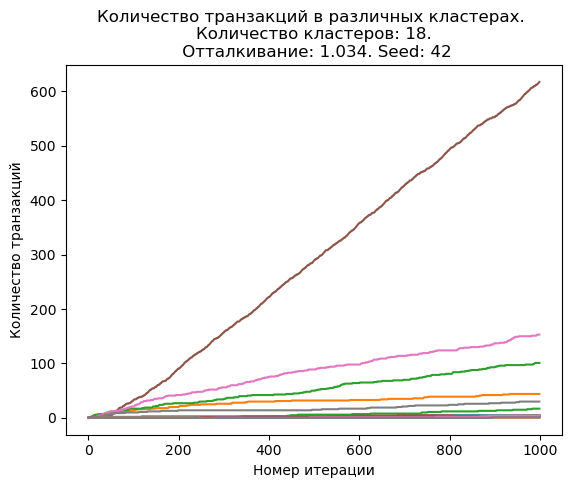

In [8]:
clope.print_history_count(repulsion, seed)

TypeError: get_count_clusters() missing 1 required positional argument: 'target_classes_dict'

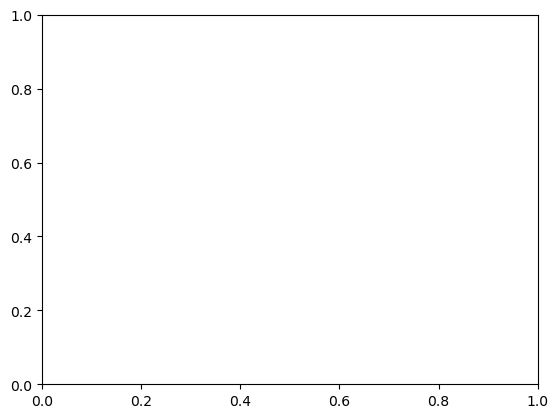

In [27]:
import matplotlib.pyplot as plt

noiseLimit = 0
seed = 42
_, ax = plt.subplots()
linspace = np.hstack((np.arange(1.2, 2.6, 0.2), np.arange(2.6, 3.5, 0.1), np.arange(3.5, 5, 0.5)))
for r in linspace:
    clope = CLOPE(print_step=0, is_save_history=True, random_seed=seed)
    clope.init_clusters(processed_data_dict, r, noiseLimit)
    df = get_count_clusters(clope)
    df['sum'] = df['*'] + df['#,@']
    df = df.sort_values(by='sum')
    ax.plot(list(df['sum']))
plt.title('Вариационные ряды для размера кластера при различных r')
plt.xlabel('Порядковый номер отсортированных по размеру кластеров')
plt.ylabel('Размер кластера')
plt.legend(linspace)
plt.show()

Итерация:  1 . Номер шага 10000 . Число кластеров:  35
Итерация:  1 . Номер шага 20000 . Число кластеров:  35
Итерация:  1 . Номер шага 30000 . Число кластеров:  35
Итерация:  1 . Номер шага 40000 . Число кластеров:  35
Итерация:  1 . Номер шага 50000 . Число кластеров:  35
Итерация:  1 . Номер шага 60000 . Число кластеров:  36
Итерация:  1 . Номер шага 70000 . Число кластеров:  38
Итерация:  1 . Номер шага 80000 . Число кластеров:  40
Итерация:  1 . Номер шага 90000 . Число кластеров:  42
Итерация:  1 . Номер шага 100000 . Число кластеров:  46


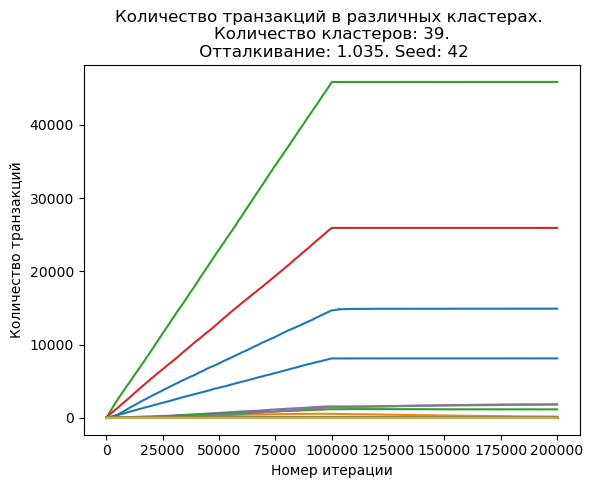

Итерация:  2 . Номер шага 10000 . Число кластеров:  40
Итерация:  2 . Номер шага 20000 . Число кластеров:  40
Итерация:  2 . Номер шага 30000 . Число кластеров:  40
Итерация:  2 . Номер шага 40000 . Число кластеров:  40
Итерация:  2 . Номер шага 50000 . Число кластеров:  43
Итерация:  2 . Номер шага 60000 . Число кластеров:  44
Итерация:  2 . Номер шага 70000 . Число кластеров:  45
Итерация:  2 . Номер шага 80000 . Число кластеров:  45
Итерация:  2 . Номер шага 90000 . Число кластеров:  48
Итерация:  2 . Номер шага 100000 . Число кластеров:  49


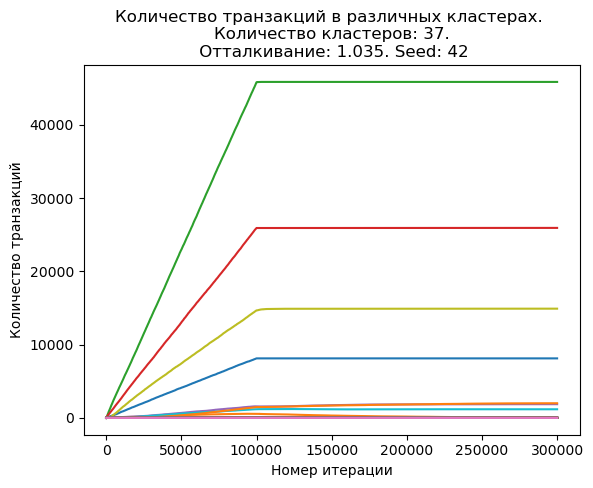

Итерация:  3 . Номер шага 10000 . Число кластеров:  37
Итерация:  3 . Номер шага 20000 . Число кластеров:  38
Итерация:  3 . Номер шага 30000 . Число кластеров:  38
Итерация:  3 . Номер шага 40000 . Число кластеров:  38
Итерация:  3 . Номер шага 50000 . Число кластеров:  39
Итерация:  3 . Номер шага 60000 . Число кластеров:  39
Итерация:  3 . Номер шага 70000 . Число кластеров:  39
Итерация:  3 . Номер шага 80000 . Число кластеров:  40
Итерация:  3 . Номер шага 90000 . Число кластеров:  40
Итерация:  3 . Номер шага 100000 . Число кластеров:  40


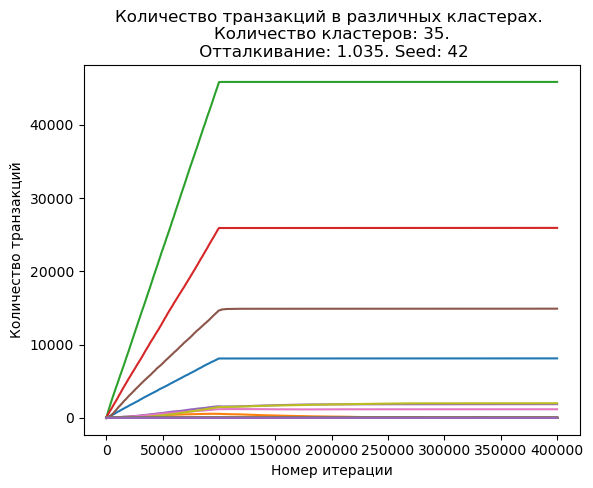

Итерация:  4 . Номер шага 10000 . Число кластеров:  35
Итерация:  4 . Номер шага 20000 . Число кластеров:  35
Итерация:  4 . Номер шага 30000 . Число кластеров:  35
Итерация:  4 . Номер шага 40000 . Число кластеров:  35
Итерация:  4 . Номер шага 50000 . Число кластеров:  35
Итерация:  4 . Номер шага 60000 . Число кластеров:  35
Итерация:  4 . Номер шага 70000 . Число кластеров:  35
Итерация:  4 . Номер шага 80000 . Число кластеров:  35
Итерация:  4 . Номер шага 90000 . Число кластеров:  35
Итерация:  4 . Номер шага 100000 . Число кластеров:  35


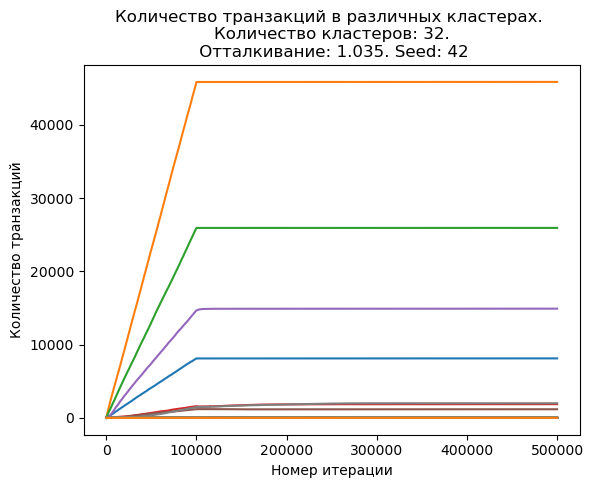

Итерация:  5 . Номер шага 10000 . Число кластеров:  32
Итерация:  5 . Номер шага 20000 . Число кластеров:  32
Итерация:  5 . Номер шага 30000 . Число кластеров:  32
Итерация:  5 . Номер шага 40000 . Число кластеров:  32
Итерация:  5 . Номер шага 50000 . Число кластеров:  32
Итерация:  5 . Номер шага 60000 . Число кластеров:  32
Итерация:  5 . Номер шага 70000 . Число кластеров:  32
Итерация:  5 . Номер шага 80000 . Число кластеров:  32
Итерация:  5 . Номер шага 90000 . Число кластеров:  32
Итерация:  5 . Номер шага 100000 . Число кластеров:  32


In [189]:
while clope.next_step(processed_data_dict, repulsion, noiseLimit) > 0:
    clope.print_history_count(repulsion, seed)

In [218]:
from collections import Counter

def find_mode(clope, target_classes_dict, processed_data_dict):
    mode_dict = {}
    
    # Считаем частоту каждой транзакции для каждого класса
    for itemTransact, cluster in clope.transaction.items():
        target_class = target_classes_dict.get(itemTransact)
        transaction = ", ".join(processed_data_dict[itemTransact])
        
        if target_class:
            if target_class not in mode_dict:
                mode_dict[target_class] = []
            
            mode_dict[target_class].append(transaction)
    
    # Находим моду и ее удельный вес для каждого класса
    for target_class, transactions in mode_dict.items():
        most_common, count = Counter(transactions).most_common(1)[0]
        mode_weight = round(count / len(transactions), 3)  # округляем удельный вес до тысячных
        mode_dict[target_class] = (most_common, mode_weight)
    
    return mode_dict

# Пример использования функции
mode_dict = find_mode(clope, target_classes_dict, processed_data_dict)
len(mode_dict)
mode_dict



{'*': ('6_0', 0.132),
 'n@': ('4f28_0, f3_1', 0.002),
 'd#': ('4f2_0', 0.056),
 'n#': ('6f2_0', 0.03),
 'w@': ('4f18_0, f3_1', 0.004),
 'x@': ('6n_0, 5f3_1', 0.006),
 'd@': ('6n_0, 5b2_1', 0.003),
 '4d': ('6d_0', 0.189),
 'w#': ('4f1_0', 0.043),
 's#': ('6_0', 0.263),
 'x#': ('6f3_0', 0.057),
 'b@': ('6f_0', 0.049),
 'z#': ('6r27_0, f+1_1, f3_2', 0.011),
 'b#': ('6_0', 0.22),
 'r#': ('4_0', 0.145),
 '@': ('4b29_0', 0.006),
 'm#': ('5+_0, r27_1, f3_2', 0.016),
 'f#': ('6_0', 0.226),
 '4n': ('4n_0', 0.217),
 '6n': ('6n_0', 0.218),
 'v#': ('6f27_0, f+1_1, f1_2', 0.015),
 '6d': ('6n_0', 0.209),
 'c6': ('6n_0', 0.308),
 '#': ('6_0', 0.252),
 '5n': ('4n_0', 0.199),
 'l#': ('c4_0, b28_1, f+1_2', 0.029),
 '5d': ('6d_0', 0.173),
 '6w': ('4n_0', 0.202),
 '4w': ('4n_0', 0.215),
 'h#': ('6n_0, 5b29_1, b3_2, b3_3, b2_4, f+1_5, f1_6', 0.036),
 'f@': ('4b27_0', 0.037),
 'z@': ('4+_0, b2_1', 0.111),
 'o#': ('6+_0, b27_1, z3_2, m3_3', 0.2),
 '4x': ('4n_0', 0.302),
 'f*': ('4s_0', 0.136),
 'c4': ('6n_0'

In [224]:
import warnings

# Игнорирование предупреждений PerformanceWarning
warnings.filterwarnings(action='ignore', category=pd.errors.PerformanceWarning)


def add_mode_to_clusters(clope, mode_dict, df):
    new_columns = pd.DataFrame(index=df.index)  # Создаем новый DataFrame для новых столбцов
    
    for target_class, (mode, mode_weight) in mode_dict.items():
        mode_column = f"Mode_of_{target_class}"
        weight_column = f"Mode_Weight_of_{target_class}"
        
        # Инициализация новых столбцов как None
        new_columns[mode_column] = None
        new_columns[weight_column] = None
        
        # Ищем кластер, содержащий моду
        for itemTransact, cluster in clope.transaction.items():
            transaction = ", ".join(processed_data_dict[itemTransact])
            if transaction == mode:
                new_columns.loc[cluster, mode_column] = mode  # Добавляем моду
                new_columns.loc[cluster, weight_column] = round(mode_weight, 3)  # Добавляем удельный вес моды, округленный до тысячных
    
    # Объединяем оригинальный DataFrame с новыми столбцами
    df = pd.concat([df, new_columns], axis=1)
    return df


# Пример использования функции
df_with_modes = add_mode_to_clusters(clope, mode_dict, df)
df_with_modes


,*,"#,@",Mode_of_*,Mode_Weight_of_*,Mode_of_n@,Mode_Weight_of_n@,Mode_of_d#,Mode_Weight_of_d#,Mode_of_n#,Mode_Weight_of_n#,...,Mode_of_5w,Mode_Weight_of_5w,Mode_of_s+2,Mode_Weight_of_s+2,Mode_of_y#,Mode_Weight_of_y#,Mode_of_3,Mode_Weight_of_3,Mode_of_d*,Mode_Weight_of_d*
0,37,2,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,20,1,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,5,14,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,32687,4741,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,148,16,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,1522,426,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,37961,1480,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,97107,10146,6_0,0.132,"4f28_0, f3_1",0.002,4f2_0,0.056,6f2_0,0.03,...,5d_0,1.0,None,None,None,None,None,None,"6f27_0, b2_1",1.0
8,18767,665,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,1,0,None,None,None,None,None,None,None,None,...,5d_0,1.0,None,None,None,None,None,None,None,None


In [ ]:
import pandas as pd
import numpy as np

def add_example_to_clusters(clope, target_classes_dict, processed_data_dict, df):
    example_dict = {}
    
    # Ищем пример для каждого уникального целевого класса
    for itemTransact, cluster in clope.transaction.items():
        target_class = target_classes_dict.get(itemTransact)
        if target_class and target_class not in example_dict:
            example = ", ".join(processed_data_dict[itemTransact])  # Получаем содержимое транзакции
            example_dict[target_class] = (cluster, example)  # сохраняем номер кластера и содержимое транзакции как пример
    
    # Добавляем примеры в DataFrame
    for target_class, (cluster, example) in example_dict.items():
        if f"Example_of_{target_class}" not in df.columns:
            df[f"Example_of_{target_class}"] = np.nan  # Создаем новый столбец с NaN значениями
            df[f"Example_of_{target_class}"] = df[f"Example_of_{target_class}"].astype('object')  # Устанавливаем тип данных столбца как object
        
        df.at[cluster, f"Example_of_{target_class}"] = example  # Используем метод .at[] для присвоения значения, так как он быстрее и менее подвержен ошибкам
    
    return df


# Получаем DataFrame с учетом целевых классов и упорядочиваем его
df = get_count_clusters(clope, target_classes_dict)
df['sum'] = df.sum(axis=1)
df_sorted = df.sort_values(by='sum', ascending=False)
df_sorted = df_sorted.drop(columns=['sum'])

# Добавляем примеры каждого целевого класса в DataFrame
df_with_examples = add_example_to_clusters(clope, target_classes_dict, processed_data_dict, df_sorted)

# Преобразовываем все столбцы с примерами в тип object
example_columns = [col for col in df_with_examples.columns if col.startswith("Example_of_")]
df_with_examples[example_columns] = df_with_examples[example_columns].astype(object)

# Теперь вы можете вывести или анализировать DataFrame с примерами
df_with_examples
